<h1> Problem

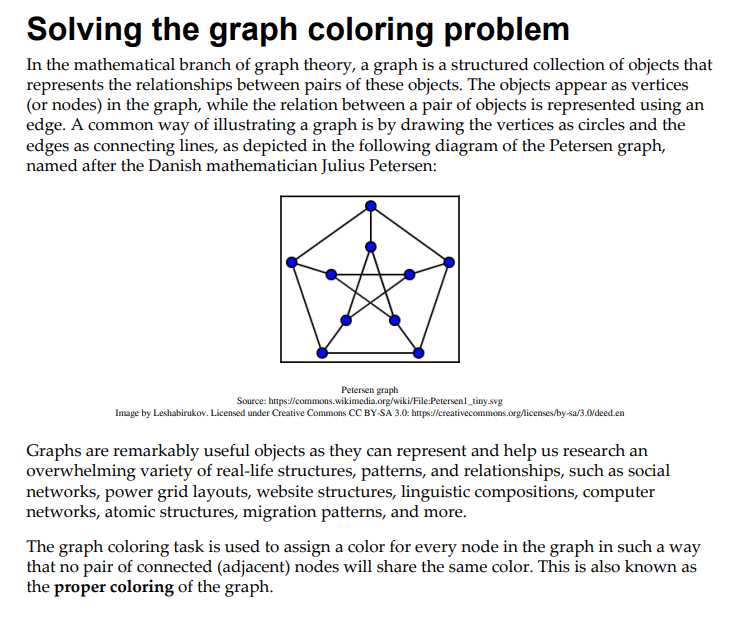

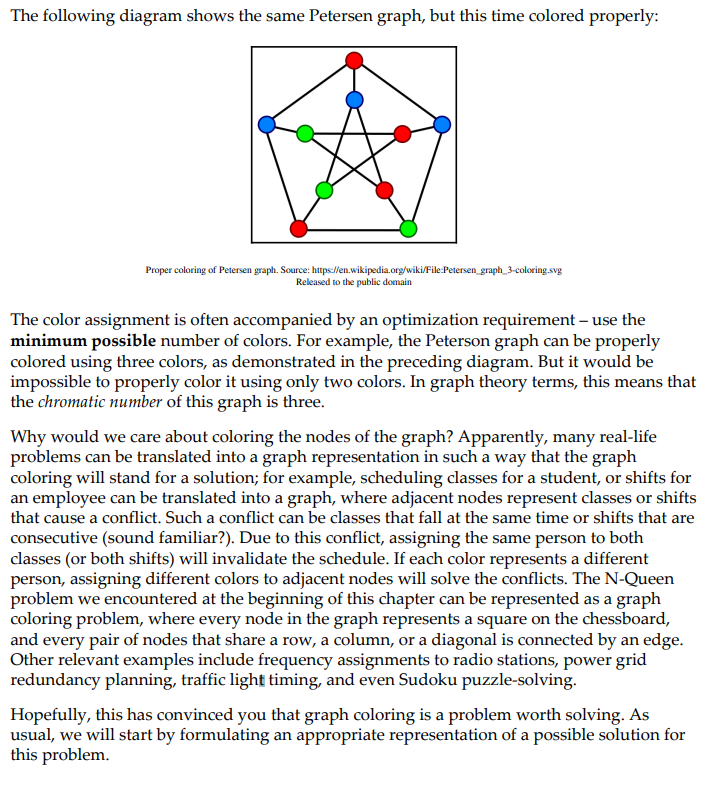

In [1]:
!pip install deap
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1> Solution Representation

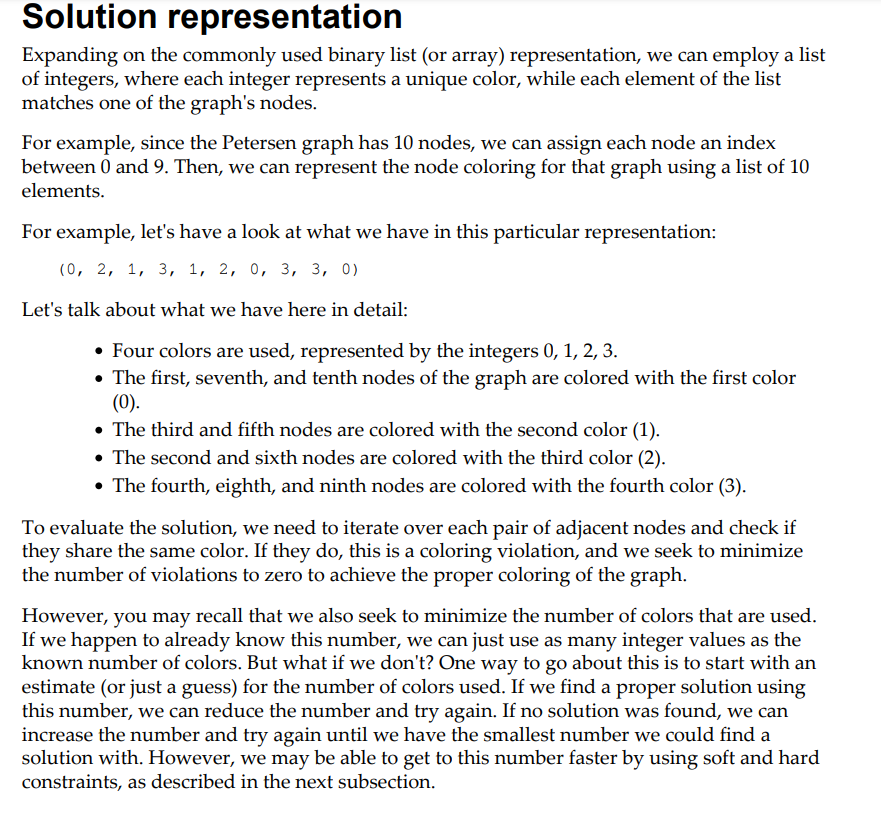

<h1> Fitness function and plotfunc

In [2]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np


# FITNESS FUNCTION
solution = [3, 5, 2, 4, 1, 1, 3, 3, 1, 4]
def fitness_function(solution, HARD_CONSTRAINTS_MULTIPLICATOR=10):
  global matrix
  matriz = matrix.copy()
  consecutive_color_violation = 0 # ( HARD )
  number_of_colors_violation = len(set(solution)) # ( SOFT )
  for i, cor in enumerate(solution):
    matriz[i] = [j*cor for j in matriz[i]]
    for j in range(len(solution)):
      if matriz[i][j] == solution[j]:
        consecutive_color_violation += 1

  violations = HARD_CONSTRAINTS_MULTIPLICATOR*(consecutive_color_violation/2) + number_of_colors_violation
  return violations,


def plotGraph(solution):
  global graph
  # Colors
  colorList = list(set(solution))
  colors = plt.cm.rainbow(np.linspace(0, 1, len(colorList)))
  colorMap = []
  for i in range(len(solution)):
      color = colors[colorList.index(solution[i])]
      colorMap.append(color)

  # Plotting
  plt.figure(figsize=(8,6))
  nx.draw_kamada_kawai(graph, node_color=colorMap, with_labels=True)
  #nx.draw_circular(graph, node_color=colorMap, with_labels=True)
  plt.show()



#print(fitness_function(solution))
#plotGraph(solution)

<h1> Graph

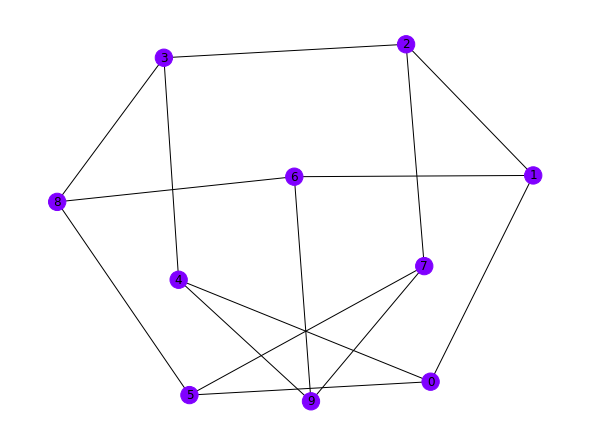

In [3]:
import networkx as nx

# TAKING THE GRAPH DATA
graph = nx.petersen_graph()
matrix = nx.adjacency_matrix(graph).todense().tolist()

# PLOTTING THE PROBLEM
plotGraph([0 for i in range(10)])

<h1> Solving the problem

In [4]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
COLORS_NUMBER = 4
NODES_NUMBER = 10
def gene(colors): # The gene will be the color that the node has got
  return random.randint(1,colors)
toolbox.register("Gene", gene, colors=COLORS_NUMBER)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=NODES_NUMBER)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)

# GENETIC OPERATORS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniform, indpb=1/NODES_NUMBER)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=COLORS_NUMBER, indpb=1/NODES_NUMBER)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(3)


# CONTROL PANEL
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 25 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

gen	nevals	max	min	mean 
0  	100   	74 	13 	44.28
1  	97    	64 	4  	36.05
2  	93    	63 	13 	32.48
3  	95    	83 	4  	28.7 
4  	96    	54 	4  	23.27
5  	92    	64 	4  	21.16
6  	83    	54 	4  	21.24
7  	96    	44 	4  	18.78
8  	95    	54 	4  	16.95
9  	98    	44 	4  	13.67
10 	90    	34 	4  	11.84
11 	87    	24 	3  	8.74 
12 	91    	34 	3  	6.15 
13 	90    	24 	3  	5.85 
14 	96    	34 	3  	5.76 
15 	85    	24 	3  	4.75 
16 	91    	24 	3  	4.32 
17 	94    	24 	3  	4.5  
18 	89    	23 	3  	4.5  
19 	88    	24 	3  	4.57 
20 	88    	14 	3  	3.78 
21 	84    	34 	3  	4.28 
22 	83    	33 	3  	3.67 
23 	84    	24 	3  	3.34 
24 	85    	24 	3  	3.62 
25 	90    	23 	3  	3.32 


<h1> Plotting results

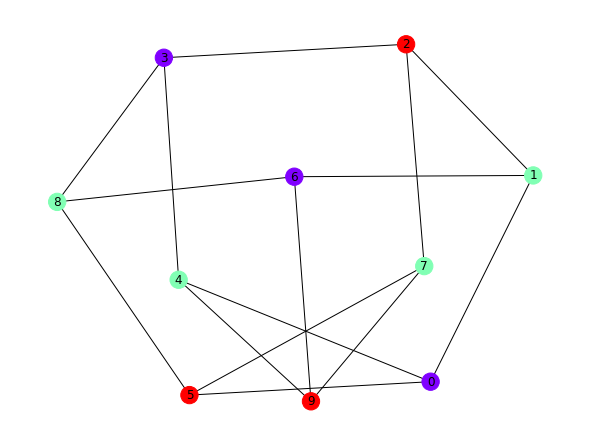

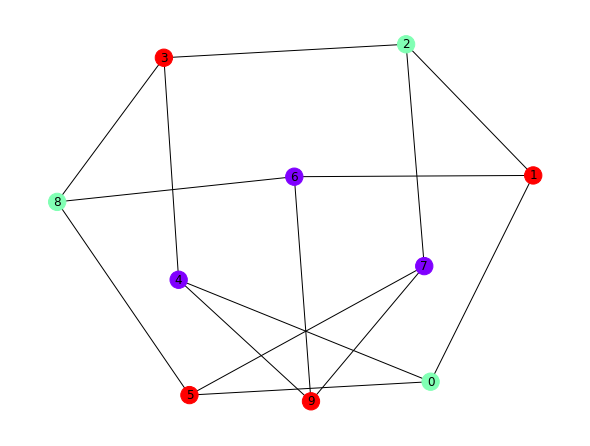

In [5]:
for i in range(len(hof)-1):
  plotGraph(hof[i])

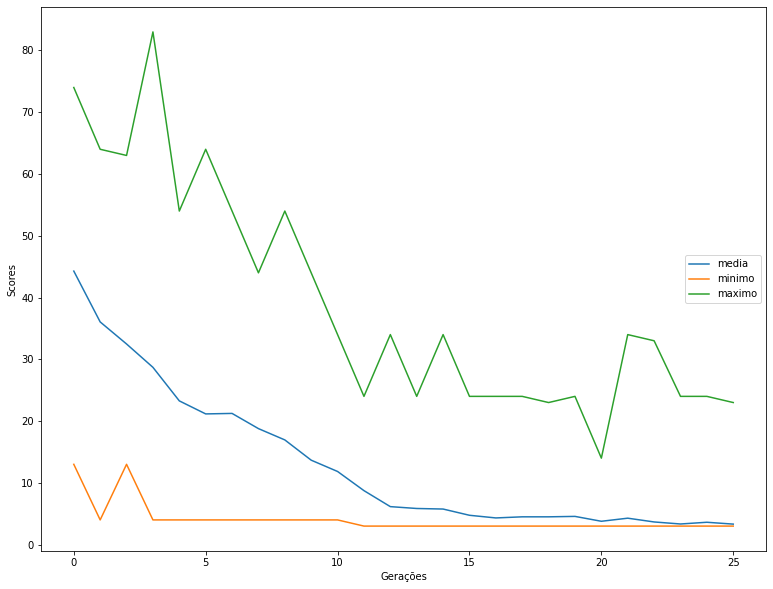

In [6]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

<h1> Trying to solve a bigger graph

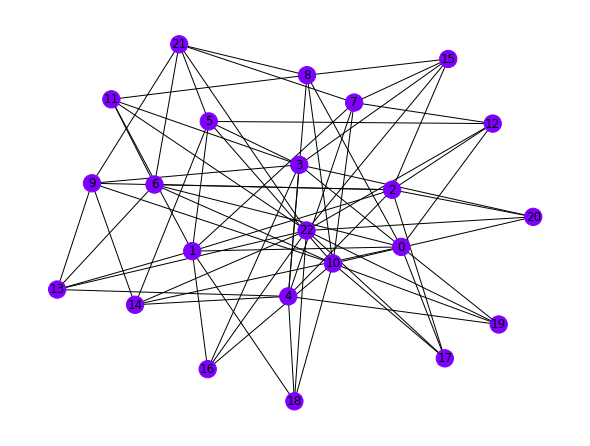

In [7]:
import networkx as nx

# TAKING THE GRAPH DATA
graph = nx.mycielski_graph(n=5)
matrix = nx.adjacency_matrix(graph).todense().tolist()

# PLOTTING THE PROBLEM
plotGraph([0 for i in range(len(matrix))])

In [8]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
COLORS_NUMBER = 10
NODES_NUMBER = len(matrix)
def gene(colors): # The gene will be the color that the node has got
  return random.randint(1,colors)
toolbox.register("Gene", gene, colors=COLORS_NUMBER)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=NODES_NUMBER)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)

# GENETIC OPERATORS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniform, indpb=1/NODES_NUMBER)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=COLORS_NUMBER, indpb=1/NODES_NUMBER)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(3)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	min	mean  
0  	1000  	168	19 	79.485
1  	924   	138	10 	65.439
2  	920   	109	9  	55.61 
3  	905   	119	8  	49.025
4  	896   	99 	9  	42.175
5  	921   	98 	8  	37.445
6  	928   	90 	9  	33.744
7  	940   	80 	9  	29.77 
8  	897   	89 	8  	27.513
9  	880   	90 	8  	25.8  
10 	915   	78 	8  	23.613
11 	898   	88 	8  	22.35 
12 	911   	79 	8  	20.533
13 	927   	89 	8  	19.487
14 	885   	87 	8  	17.751
15 	903   	100	8  	16.089
16 	911   	70 	8  	14.85 
17 	909   	80 	8  	14.418
18 	882   	80 	8  	13.53 
19 	914   	70 	7  	12.401
20 	926   	68 	7  	11.498
21 	938   	48 	7  	10.598
22 	903   	48 	7  	10.104
23 	894   	79 	7  	9.519 
24 	897   	58 	7  	9.317 
25 	915   	59 	7  	9.141 
26 	900   	59 	7  	9.009 
27 	913   	88 	7  	8.532 
28 	897   	58 	7  	8.287 
29 	930   	48 	7  	8.026 
30 	908   	48 	7  	7.769 
31 	902   	57 	7  	7.765 
32 	908   	58 	7  	8.212 
33 	891   	78 	6  	7.835 
34 	901   	57 	6  	7.779 
35 	911   	77 	6  	7.728 
36 	926   	57 	6  	7.84  
37 	923   	6

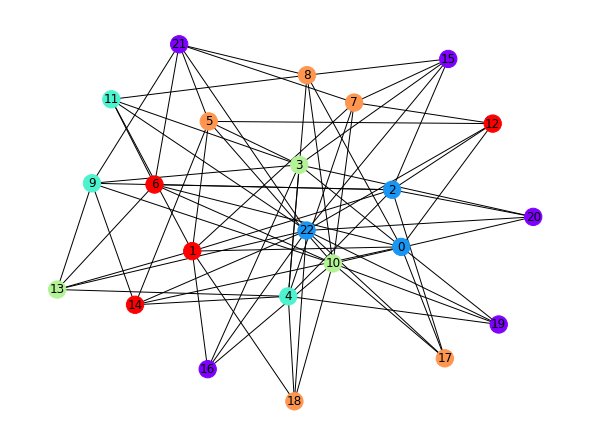

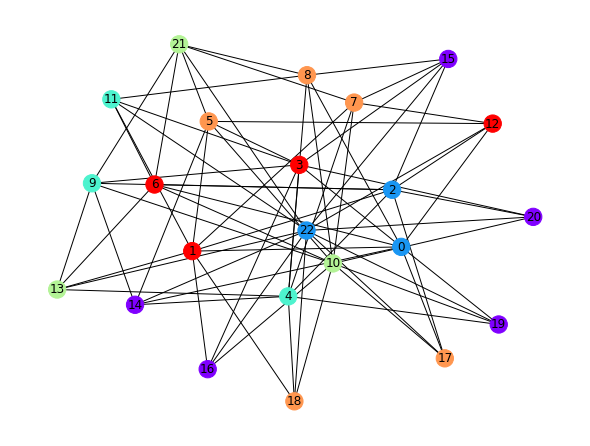

In [9]:
for i in range(len(hof)-1):
  plotGraph(hof[i])

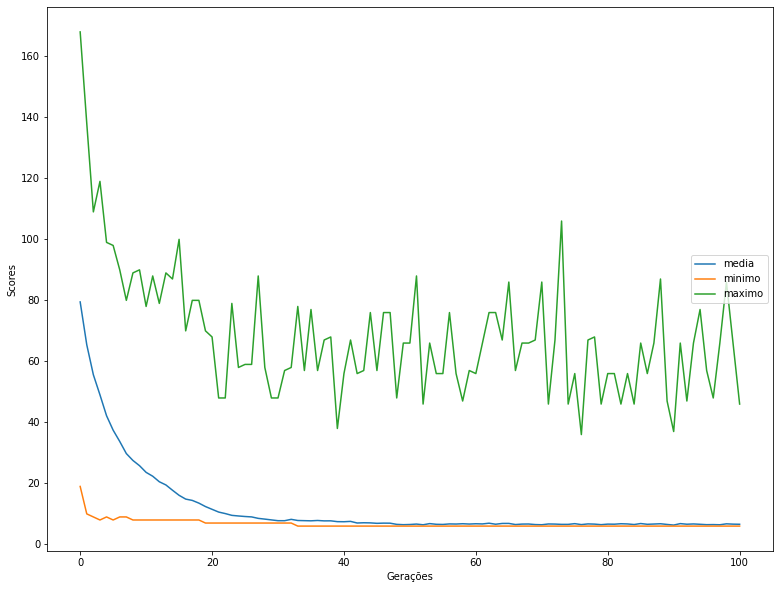

In [10]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

<h1> Trying improve the result

In [11]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [12]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
COLORS_NUMBER = 10
NODES_NUMBER = len(matrix)
def gene(colors): # The gene will be the color that the node has got
  return random.randint(1,colors)
toolbox.register("Gene", gene, colors=COLORS_NUMBER)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=NODES_NUMBER)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)

# GENETIC OPERATORS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=1/NODES_NUMBER)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=COLORS_NUMBER, indpb=2/NODES_NUMBER)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(100)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	min	mean 
0  	1000  	167	20 	80.23
1  	832   	128	19 	61.682
2  	820   	108	10 	48.378
3  	817   	97 	9  	39.584
4  	812   	90 	9  	32.633
5  	836   	79 	9  	27.578
6  	803   	79 	9  	22.867
7  	802   	89 	8  	19.543
8  	814   	89 	8  	16.928
9  	809   	89 	7  	15.184
10 	810   	78 	7  	13.928
11 	824   	88 	7  	14.066
12 	823   	77 	7  	14.228
13 	807   	69 	7  	13.036
14 	841   	98 	7  	13.324
15 	822   	89 	7  	13.085
16 	811   	78 	7  	11.673
17 	805   	68 	7  	11.62 
18 	814   	59 	7  	10.417
19 	816   	77 	7  	11.565
20 	821   	88 	7  	10.681
21 	800   	68 	7  	10.446
22 	833   	77 	7  	10.422
23 	824   	87 	7  	9.743 
24 	827   	77 	7  	10.362
25 	803   	87 	6  	10.183
26 	840   	77 	6  	9.874 
27 	804   	77 	6  	10.021
28 	818   	87 	6  	9.617 
29 	834   	76 	6  	9.723 
30 	818   	77 	6  	9.739 
31 	831   	67 	6  	8.74  
32 	814   	77 	6  	8.922 
33 	814   	76 	6  	7.484 
34 	806   	67 	6  	7.573 
35 	810   	88 	6  	7.226 
36 	807   	76 	6  	7.451 
37 	826   	77 

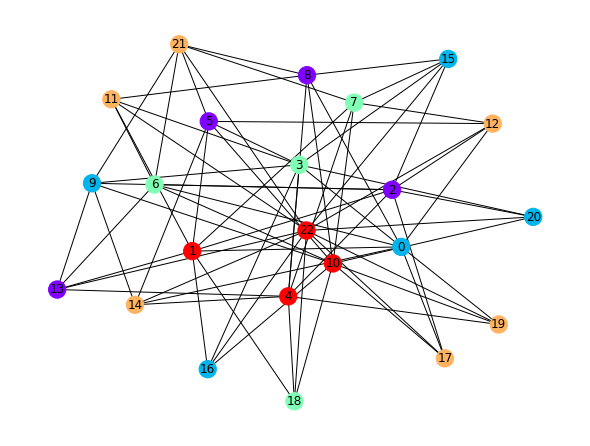

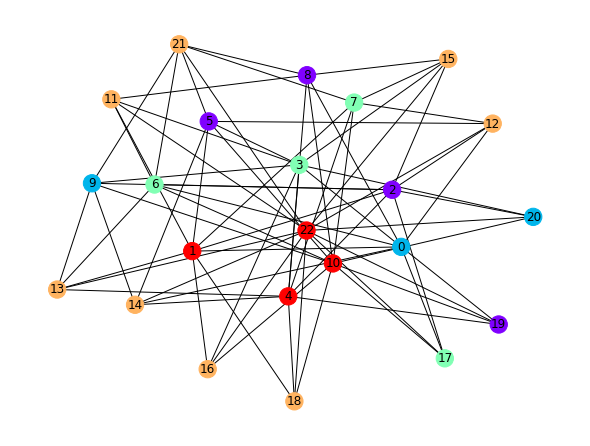

In [15]:
for i in range(2):
  plotGraph(hof[i])

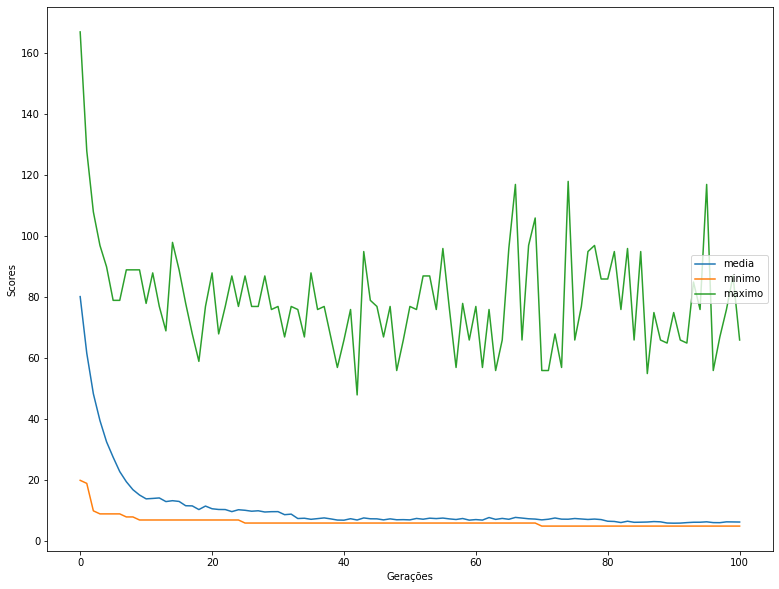

In [14]:
import matplotlib.pyplot as plt

# taking data
y_mean = logbook.select("mean")
y_min = logbook.select("min")
y_max = logbook.select("max")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()